In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
heart_original = pd.read_csv('data/heart.csv', sep=',')
data = heart_original.copy()

In [3]:
data.head(5)
# cp is chest pain type: contains 4 values
# trstbps: resting blod pressure
# chol: serum cholestrol in mg/dl
# fbs: fasting blood sugar > 120 mg/dl
# restecg: resting electrocardiographic results
# thalach: max heart rate achieved
# exang: exercise included angina
# oldpeak: ST despression induced by exercise relative to rest
# slope: slope of the peak exercise ST segment
# ca: number of major vessels
# thal: normal, fixed defect, reversable defect
# target: 0 is less chance of heart attack, 1 is more chance of heart attack

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
print(f'Total # of rows: {data.shape[0]}')
print(f'Total # of columns: {data.shape[1]}')

Total # of rows: 1025
Total # of columns: 14


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data_dup = data.duplicated().any()
print(data_dup)

True


In [9]:
data = data.drop_duplicates()

In [10]:
print(f'Total # of rows: {data.shape[0]}')
print(f'Total # of columns: {data.shape[1]}')

Total # of rows: 302
Total # of columns: 14


In [11]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


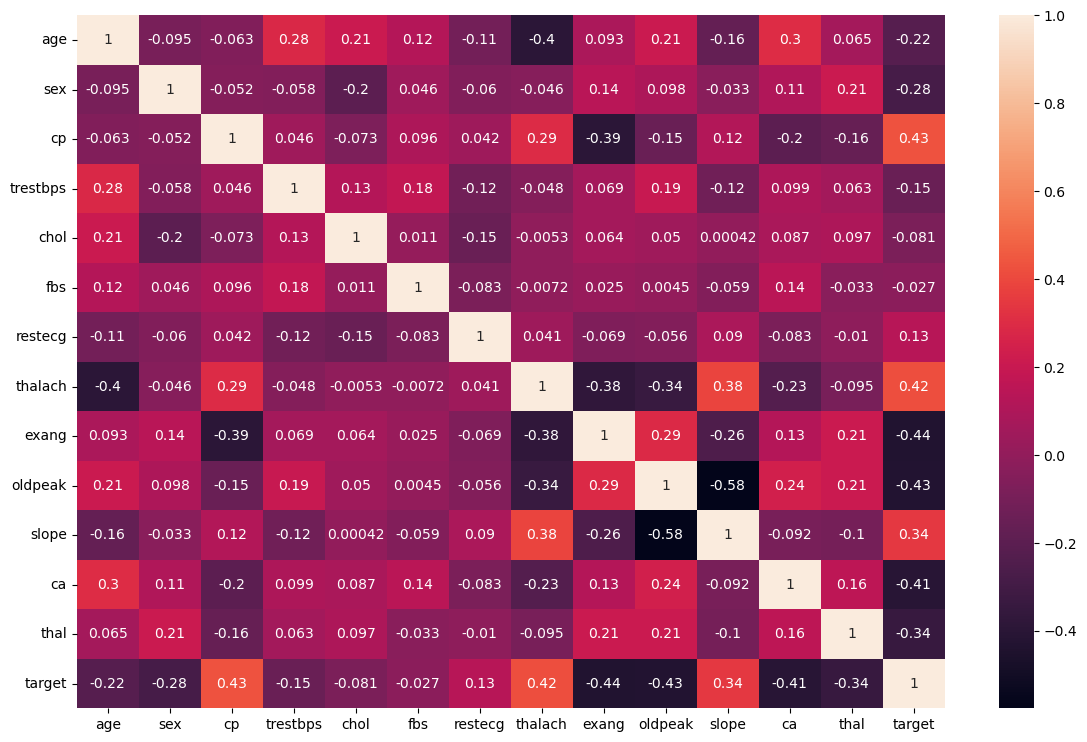

In [27]:
fig, ax = plt.subplots(figsize=(14,9))
sns.heatmap(data.corr(), annot=True, ax=ax)
plt.show()

In [33]:
# count of unique values
data['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

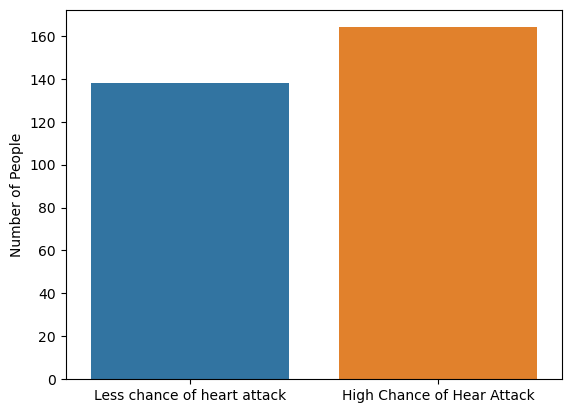

In [49]:
sns.countplot(x = 'target', data=data, hue='target', legend=False)
plt.ylabel("Number of People")
plt.xlabel(None)
plt.xticks([0,1], ['Less chance of heart attack', 'High Chance of Hear Attack'])
plt.show()

In [50]:
data['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

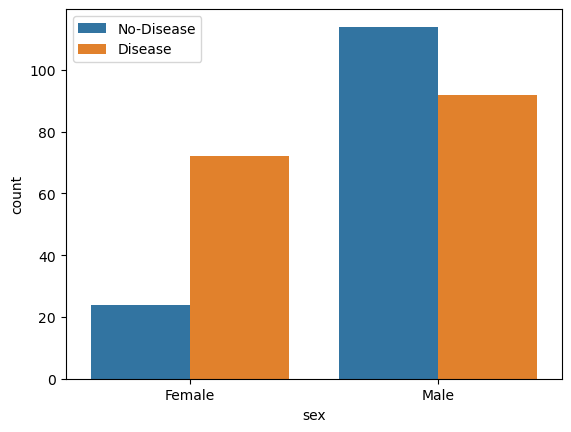

In [61]:
sns.countplot(x='sex', hue='target', data=data)
plt.xticks([1,0], ['Male', 'Female'])
plt.legend(labels=['No-Disease', 'Disease'])
plt.show()

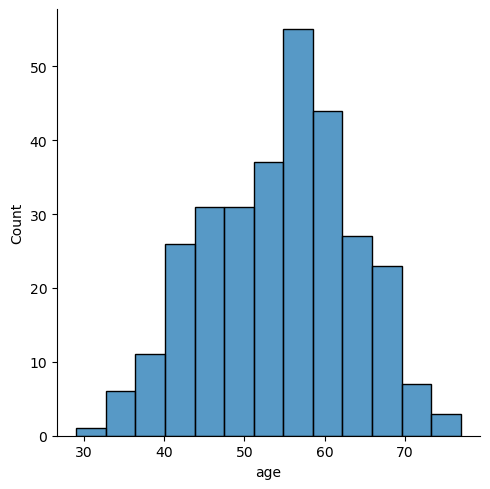

In [66]:
sns.displot(data['age'])
plt.show()

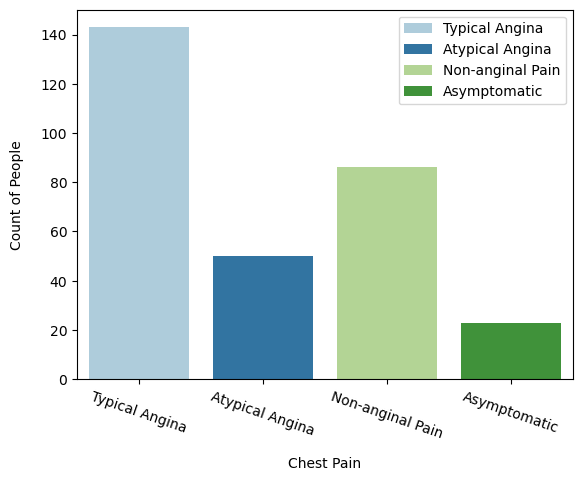

In [100]:
sns.countplot(x = 'cp', data = data, hue='cp', palette='Paired')
plt.xticks([0,1,2,3], ['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'], rotation=-19)
plt.legend(labels=['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])
plt.xlabel('Chest Pain', loc='center', labelpad=12)
plt.ylabel('Count of People', labelpad=12)
plt.show()

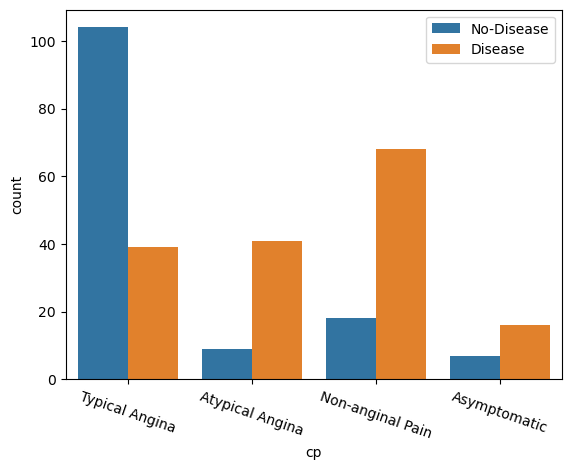

In [104]:
sns.countplot(x='cp', hue='target', data=data)
plt.legend(labels=['No-Disease', 'Disease'])
plt.xticks([0,1,2,3], ['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'], rotation=-19)
plt.show()

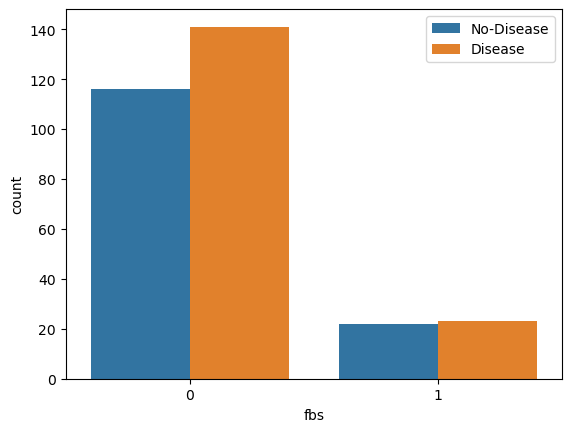

In [105]:
sns.countplot(x='fbs', hue='target', data=data)
plt.legend(labels=['No-Disease', 'Disease'])
plt.show()

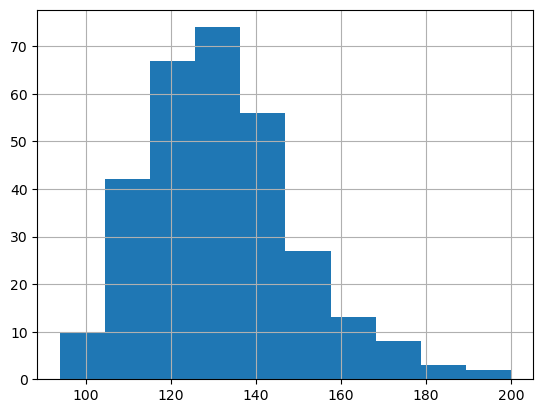

In [107]:
data['trestbps'].hist()
plt.show()

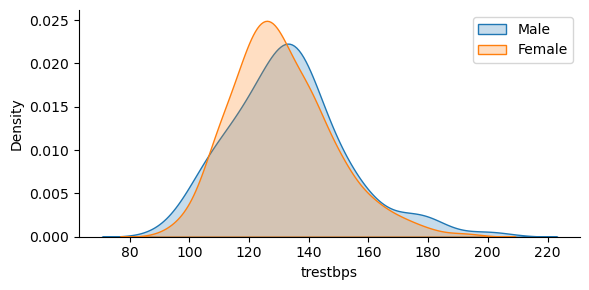

In [115]:
g = sns.FacetGrid(data, hue='sex', aspect=2)
g.map(sns.kdeplot, 'trestbps', fill=True)
plt.legend(labels=['Male', 'Female'])
plt.show()

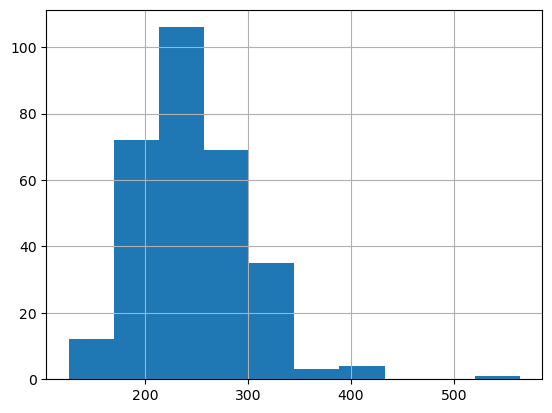

In [117]:
data['chol'].hist()
plt.show()

In [121]:
categories = []
continuous = []

for col in data.columns:
    if data[col].nunique() <= 10:
        categories.append(col)
    else:
        continuous.append(col)

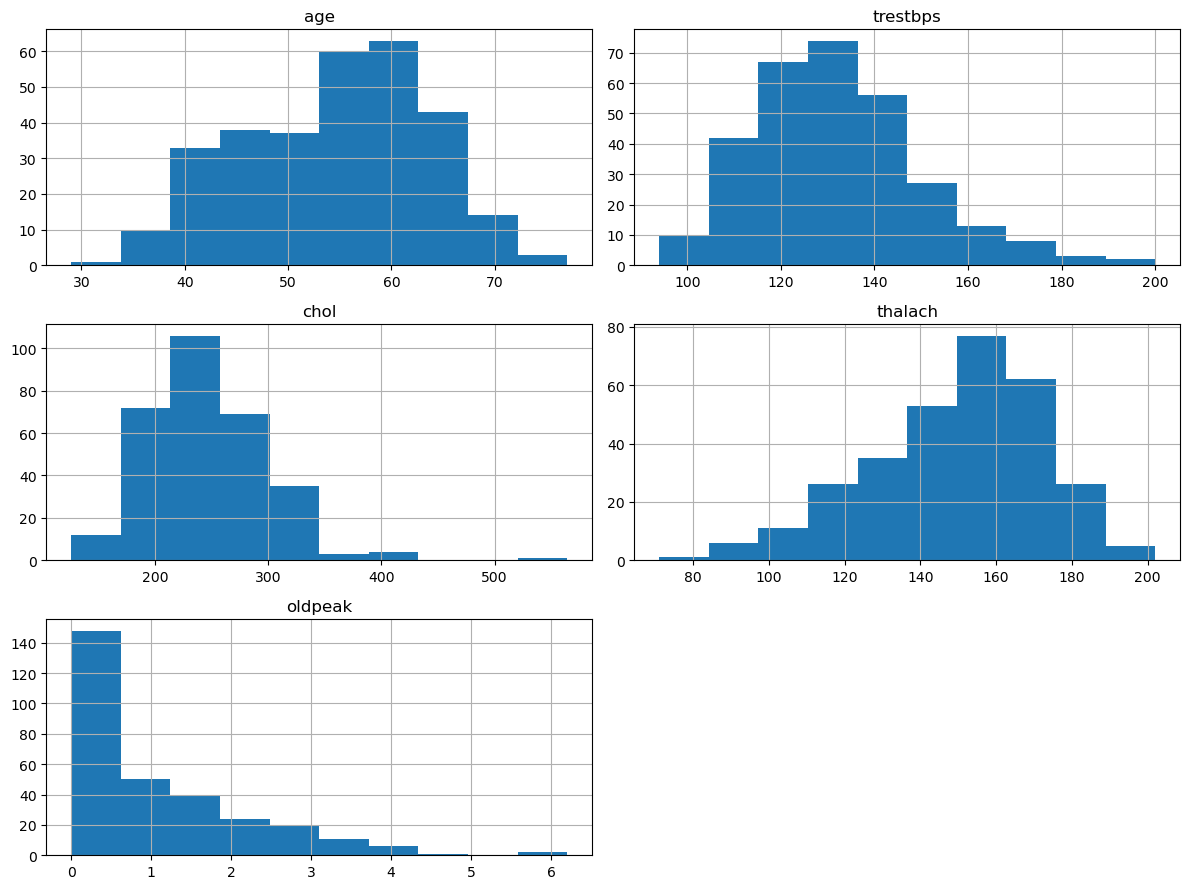

In [ ]:
data.hist(continuous, figsize=(12, 9))
plt.tight_layout()
plt.show()